In [190]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [191]:
def recategorize(data,columnname):
    
    counts = data[columnname].value_counts()
    nameSet = set(counts[counts>= 0.01*len(data.index)].index.values)
    
    data.loc[:,columnname] = data[columnname].apply(lambda x:'OTHER'if x not in nameSet else x)
    return data

In [192]:

data = pd.read_csv("training.csv")

print(len(data.index)) # number of data (cars)

data.info()
#如果有一個missing 則去掉此物件
data2 = data.dropna(axis =0, how = 'any', subset = ['Color',
                                                    'Transmission',
                                                    'Nationality',
                                                    'Size',
                                                    'TopThreeAmericanName',
                                                    'MMRAcquisitionAuctionAveragePrice',
                                                    'MMRAcquisitionAuctionCleanPrice',
                                                    'MMRAcquisitionRetailAveragePrice',
                                                    'MMRAcquisitonRetailCleanPrice',
                                                    'MMRCurrentAuctionAveragePrice',
                                                    'MMRCurrentAuctionCleanPrice',
                                                    'MMRCurrentRetailAveragePrice',
                                                    'MMRCurrentRetailCleanPrice'])
data.head()

72983
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nati

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [193]:
for i in range(len(data2.columns)):
    data2 = recategorize(data2, str(data2.columns[i]))

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [194]:
data2['Make'].unique()

array(['MAZDA', 'DODGE', 'FORD', 'MITSUBISHI', 'KIA', 'OTHER', 'NISSAN',
       'CHEVROLET', 'SATURN', 'CHRYSLER', 'MERCURY', 'HYUNDAI', 'TOYOTA',
       'PONTIAC', 'SUZUKI', 'JEEP'], dtype=object)

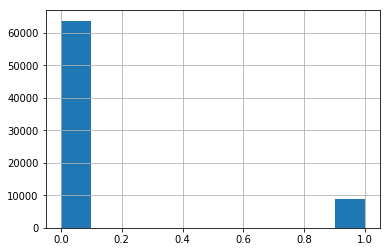

In [195]:
data2.IsBadBuy.hist()
plt.show()
#data2.Make.hist()
#data2.Make.value_counts().plot(kind='bar')
#plt.show()


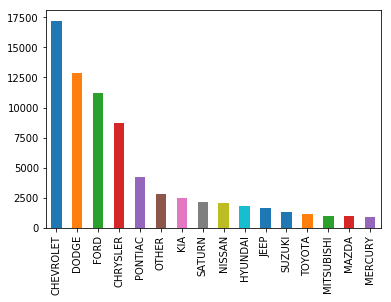

In [196]:
#data2 = recategorize(data2, 'Make')
data2.Make.value_counts().plot(kind='bar')

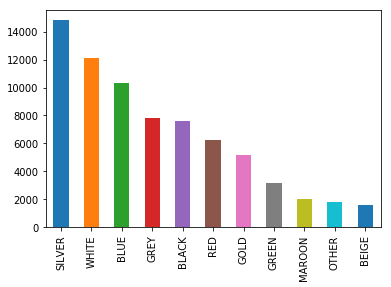

In [197]:
#data2 = recategorize(data2, 'Color')
data2.Color.value_counts().plot(kind='bar')

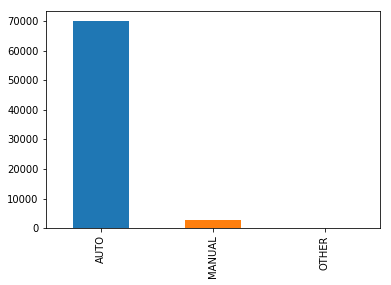

In [198]:
data2.Transmission.value_counts().plot(kind='bar')

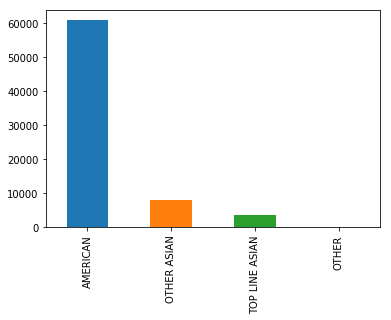

In [199]:
data2.Nationality.value_counts().plot(kind='bar')

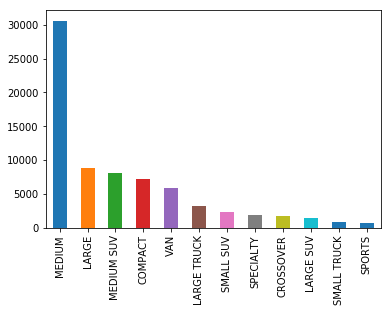

In [200]:
data2.Size.value_counts().plot(kind='bar')

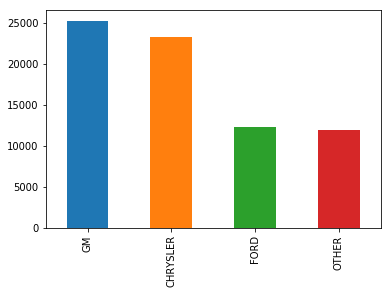

In [201]:
data2.TopThreeAmericanName.value_counts().plot(kind='bar')

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


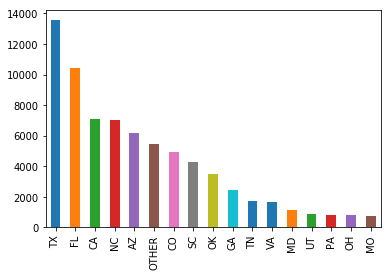

In [202]:
data2 = recategorize(data2, 'VNST')
data2.VNST.value_counts().plot(kind='bar')

In [203]:
data2.info()
data2_cleaned = data2.drop(["RefId","PurchDate","VehYear","WheelTypeID","BYRNO","VNZIP1","PRIMEUNIT","AUCGUART","Trim"],axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72658 non-null object
IsBadBuy                             72658 non-null int64
PurchDate                            72658 non-null object
Auction                              72658 non-null object
VehYear                              72658 non-null object
VehicleAge                           72658 non-null object
Make                                 72658 non-null object
Model                                72658 non-null object
Trim                                 72658 non-null object
SubModel                             72658 non-null object
Color                                72658 non-null object
Transmission                         72658 non-null object
WheelTypeID                          72658 non-null object
WheelType                            72658 non-null object
VehOdo                               72658 non-null object
Nationa

In [204]:
data2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Data columns (total 25 columns):
IsBadBuy                             72658 non-null int64
Auction                              72658 non-null object
VehicleAge                           72658 non-null object
Make                                 72658 non-null object
Model                                72658 non-null object
SubModel                             72658 non-null object
Color                                72658 non-null object
Transmission                         72658 non-null object
WheelType                            72658 non-null object
VehOdo                               72658 non-null object
Nationality                          72658 non-null object
Size                                 72658 non-null object
TopThreeAmericanName                 72658 non-null object
MMRAcquisitionAuctionAveragePrice    72658 non-null object
MMRAcquisitionAuctionCleanPrice      72658 non-null object
MMRAcqu

In [205]:
dataFinal = pd.get_dummies(data2_cleaned)
len(list(dataFinal))
dataFinal.head()
Y = dataFinal.loc[:,"IsBadBuy"]
X = dataFinal.drop("IsBadBuy",1)
#X.head()
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Columns: 166 entries, IsBadBuy to WarrantyCost_OTHER
dtypes: int64(2), uint8(164)
memory usage: 13.0 MB


In [219]:
from sklearn.preprocessing import StandardScaler as SC
sc = SC()
Xnew = sc.fit_transform(X)
X = np.array(X)
Y = np.array(Y)
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
X_train_ori, X_test_ori, Y_train_ori, Y_test_ori = train_test_split(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(Xnew, Y)


Y_train_ori_onehot = np_utils.to_categorical(Y_train_ori)
Y_test_ori_onehot = np_utils.to_categorical(Y_test_ori)
Y_train_onehot = np_utils.to_categorical(Y_train)
Y_test_onehot = np_utils.to_categorical(Y_test)



C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [216]:
#acc = []
i = 40
#for i in range(5,50):
model = Sequential()
    #輸入層：7, 隱藏層：50，輸出層：2
model.add(Dense(units=i, 
                input_dim=165,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dense(units=i,
                kernel_initializer='normal',
                activation='relu'))
    
model.add(Dropout(0.1))
    
model.add(Dense(units=2,
                kernel_initializer='normal',
                activation='softmax'))
    #定義訓練方式
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
train_history =model.fit(x=X_train_ori,
                         y=Y_train_ori_onehot,
                         validation_split=0.05, 
                         epochs=1500,
                         batch_size=30,
                         verbose=2)

    #評估準確率
scores = model.evaluate(X_test_ori, Y_test_ori_onehot)
print('\n準確率=',scores[1])
#acc.append(scores[1])

W0213 13:42:58.675743  5804 deprecation.py:323] From C:\Users\User\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 51768 samples, validate on 2725 samples
Epoch 1/1500
 - 3s - loss: 0.3277 - acc: 0.8907 - val_loss: 0.3178 - val_acc: 0.8928
Epoch 2/1500
 - 2s - loss: 0.3085 - acc: 0.8990 - val_loss: 0.3140 - val_acc: 0.8939
Epoch 3/1500
 - 2s - loss: 0.3062 - acc: 0.8996 - val_loss: 0.3125 - val_acc: 0.8950
Epoch 4/1500
 - 2s - loss: 0.3046 - acc: 0.9001 - val_loss: 0.3171 - val_acc: 0.8939
Epoch 5/1500
 - 2s - loss: 0.3028 - acc: 0.9001 - val_loss: 0.3152 - val_acc: 0.8947
Epoch 6/1500
 - 2s - loss: 0.3010 - acc: 0.9002 - val_loss: 0.3154 - val_acc: 0.8943
Epoch 7/1500
 - 2s - loss: 0.2991 - acc: 0.9009 - val_loss: 0.3168 - val_acc: 0.8943
Epoch 8/1500
 - 2s - loss: 0.2975 - acc: 0.9012 - val_loss: 0.3155 - val_acc: 0.8961
Epoch 9/1500
 - 2s - loss: 0.2956 - acc: 0.9014 - val_loss: 0.3180 - val_acc: 0.8950
Epoch 10/1500
 - 2s - loss: 0.2939 - acc: 0.9017 - val_loss: 0.3175 - val_acc: 0.8947
Epoch 11/1500
 - 2s - loss: 0.2913 - acc: 0.9023 - val_loss: 0.3223 - val_acc: 0.8954
Epoch 12/1500


Epoch 96/1500
 - 4s - loss: 0.2283 - acc: 0.9136 - val_loss: 0.4918 - val_acc: 0.8833
Epoch 97/1500
 - 3s - loss: 0.2284 - acc: 0.9135 - val_loss: 0.5082 - val_acc: 0.8870
Epoch 98/1500
 - 3s - loss: 0.2289 - acc: 0.9133 - val_loss: 0.4820 - val_acc: 0.8870
Epoch 99/1500
 - 3s - loss: 0.2280 - acc: 0.9137 - val_loss: 0.4655 - val_acc: 0.8877
Epoch 100/1500
 - 3s - loss: 0.2274 - acc: 0.9141 - val_loss: 0.4717 - val_acc: 0.8859
Epoch 101/1500
 - 2s - loss: 0.2270 - acc: 0.9138 - val_loss: 0.4974 - val_acc: 0.8840
Epoch 102/1500
 - 2s - loss: 0.2285 - acc: 0.9141 - val_loss: 0.4731 - val_acc: 0.8826
Epoch 103/1500
 - 2s - loss: 0.2268 - acc: 0.9143 - val_loss: 0.5058 - val_acc: 0.8829
Epoch 104/1500
 - 2s - loss: 0.2270 - acc: 0.9146 - val_loss: 0.4882 - val_acc: 0.8877
Epoch 105/1500
 - 2s - loss: 0.2273 - acc: 0.9138 - val_loss: 0.4772 - val_acc: 0.8848
Epoch 106/1500
 - 2s - loss: 0.2266 - acc: 0.9143 - val_loss: 0.4965 - val_acc: 0.8873
Epoch 107/1500
 - 2s - loss: 0.2264 - acc: 0.91

Epoch 191/1500
 - 3s - loss: 0.2136 - acc: 0.9165 - val_loss: 0.5849 - val_acc: 0.8752
Epoch 192/1500
 - 3s - loss: 0.2127 - acc: 0.9168 - val_loss: 0.5916 - val_acc: 0.8767
Epoch 193/1500
 - 2s - loss: 0.2132 - acc: 0.9172 - val_loss: 0.6005 - val_acc: 0.8760
Epoch 194/1500
 - 3s - loss: 0.2112 - acc: 0.9175 - val_loss: 0.6153 - val_acc: 0.8778
Epoch 195/1500
 - 3s - loss: 0.2115 - acc: 0.9172 - val_loss: 0.5835 - val_acc: 0.8716
Epoch 196/1500
 - 2s - loss: 0.2124 - acc: 0.9171 - val_loss: 0.5743 - val_acc: 0.8730
Epoch 197/1500
 - 2s - loss: 0.2105 - acc: 0.9174 - val_loss: 0.6127 - val_acc: 0.8741
Epoch 198/1500
 - 3s - loss: 0.2122 - acc: 0.9174 - val_loss: 0.5919 - val_acc: 0.8734
Epoch 199/1500
 - 3s - loss: 0.2107 - acc: 0.9177 - val_loss: 0.5979 - val_acc: 0.8738
Epoch 200/1500
 - 3s - loss: 0.2116 - acc: 0.9173 - val_loss: 0.6101 - val_acc: 0.8749
Epoch 201/1500
 - 3s - loss: 0.2105 - acc: 0.9182 - val_loss: 0.6163 - val_acc: 0.8778
Epoch 202/1500
 - 3s - loss: 0.2114 - acc: 

 - 3s - loss: 0.2017 - acc: 0.9194 - val_loss: 0.6261 - val_acc: 0.8741
Epoch 286/1500
 - 3s - loss: 0.2032 - acc: 0.9193 - val_loss: 0.6386 - val_acc: 0.8738
Epoch 287/1500
 - 3s - loss: 0.2013 - acc: 0.9200 - val_loss: 0.6443 - val_acc: 0.8756
Epoch 288/1500
 - 3s - loss: 0.2019 - acc: 0.9199 - val_loss: 0.6331 - val_acc: 0.8716
Epoch 289/1500
 - 3s - loss: 0.2009 - acc: 0.9197 - val_loss: 0.6424 - val_acc: 0.8745
Epoch 290/1500
 - 3s - loss: 0.2025 - acc: 0.9201 - val_loss: 0.6628 - val_acc: 0.8730
Epoch 291/1500
 - 3s - loss: 0.2037 - acc: 0.9194 - val_loss: 0.6601 - val_acc: 0.8727
Epoch 292/1500
 - 3s - loss: 0.2026 - acc: 0.9200 - val_loss: 0.6666 - val_acc: 0.8730
Epoch 293/1500
 - 4s - loss: 0.2020 - acc: 0.9197 - val_loss: 0.6485 - val_acc: 0.8752
Epoch 294/1500
 - 4s - loss: 0.2029 - acc: 0.9194 - val_loss: 0.6277 - val_acc: 0.8771
Epoch 295/1500
 - 4s - loss: 0.2022 - acc: 0.9205 - val_loss: 0.6689 - val_acc: 0.8712
Epoch 296/1500
 - 4s - loss: 0.2029 - acc: 0.9194 - val_lo

Epoch 380/1500
 - 3s - loss: 0.1970 - acc: 0.9215 - val_loss: 0.6899 - val_acc: 0.8745
Epoch 381/1500
 - 3s - loss: 0.1970 - acc: 0.9206 - val_loss: 0.6638 - val_acc: 0.8701
Epoch 382/1500
 - 3s - loss: 0.1984 - acc: 0.9209 - val_loss: 0.6706 - val_acc: 0.8774
Epoch 383/1500
 - 3s - loss: 0.1973 - acc: 0.9211 - val_loss: 0.6711 - val_acc: 0.8763
Epoch 384/1500
 - 4s - loss: 0.1977 - acc: 0.9213 - val_loss: 0.6957 - val_acc: 0.8756
Epoch 385/1500
 - 4s - loss: 0.1980 - acc: 0.9218 - val_loss: 0.6791 - val_acc: 0.8745
Epoch 386/1500
 - 4s - loss: 0.1952 - acc: 0.9212 - val_loss: 0.6756 - val_acc: 0.8782
Epoch 387/1500
 - 3s - loss: 0.1990 - acc: 0.9213 - val_loss: 0.6713 - val_acc: 0.8752
Epoch 388/1500
 - 3s - loss: 0.1948 - acc: 0.9219 - val_loss: 0.6754 - val_acc: 0.8774
Epoch 389/1500
 - 3s - loss: 0.1973 - acc: 0.9209 - val_loss: 0.6918 - val_acc: 0.8727
Epoch 390/1500
 - 3s - loss: 0.1973 - acc: 0.9208 - val_loss: 0.7064 - val_acc: 0.8767
Epoch 391/1500
 - 4s - loss: 0.1974 - acc: 

 - 2s - loss: 0.1915 - acc: 0.9226 - val_loss: 0.6969 - val_acc: 0.8741
Epoch 475/1500
 - 2s - loss: 0.1954 - acc: 0.9216 - val_loss: 0.6988 - val_acc: 0.8771
Epoch 476/1500
 - 2s - loss: 0.1920 - acc: 0.9223 - val_loss: 0.6986 - val_acc: 0.8752
Epoch 477/1500
 - 2s - loss: 0.1945 - acc: 0.9218 - val_loss: 0.7191 - val_acc: 0.8741
Epoch 478/1500
 - 2s - loss: 0.1943 - acc: 0.9222 - val_loss: 0.7229 - val_acc: 0.8752
Epoch 479/1500
 - 3s - loss: 0.1943 - acc: 0.9220 - val_loss: 0.7304 - val_acc: 0.8719
Epoch 480/1500
 - 3s - loss: 0.1933 - acc: 0.9223 - val_loss: 0.7152 - val_acc: 0.8727
Epoch 481/1500
 - 3s - loss: 0.1918 - acc: 0.9223 - val_loss: 0.7080 - val_acc: 0.8738
Epoch 482/1500
 - 3s - loss: 0.1923 - acc: 0.9221 - val_loss: 0.7080 - val_acc: 0.8730
Epoch 483/1500
 - 2s - loss: 0.1928 - acc: 0.9226 - val_loss: 0.7121 - val_acc: 0.8730
Epoch 484/1500
 - 2s - loss: 0.1917 - acc: 0.9224 - val_loss: 0.7366 - val_acc: 0.8730
Epoch 485/1500
 - 2s - loss: 0.1943 - acc: 0.9214 - val_lo

Epoch 569/1500
 - 2s - loss: 0.1908 - acc: 0.9227 - val_loss: 0.7274 - val_acc: 0.8712
Epoch 570/1500
 - 2s - loss: 0.1908 - acc: 0.9228 - val_loss: 0.7336 - val_acc: 0.8738
Epoch 571/1500
 - 2s - loss: 0.1920 - acc: 0.9224 - val_loss: 0.7439 - val_acc: 0.8734
Epoch 572/1500
 - 2s - loss: 0.1891 - acc: 0.9234 - val_loss: 0.7474 - val_acc: 0.8771
Epoch 573/1500
 - 2s - loss: 0.1892 - acc: 0.9230 - val_loss: 0.7438 - val_acc: 0.8763
Epoch 574/1500
 - 3s - loss: 0.1913 - acc: 0.9228 - val_loss: 0.7284 - val_acc: 0.8756
Epoch 575/1500
 - 3s - loss: 0.1901 - acc: 0.9236 - val_loss: 0.7257 - val_acc: 0.8745
Epoch 576/1500
 - 2s - loss: 0.1887 - acc: 0.9237 - val_loss: 0.7354 - val_acc: 0.8694
Epoch 577/1500
 - 2s - loss: 0.1895 - acc: 0.9231 - val_loss: 0.7332 - val_acc: 0.8690
Epoch 578/1500
 - 2s - loss: 0.1914 - acc: 0.9223 - val_loss: 0.7025 - val_acc: 0.8705
Epoch 579/1500
 - 2s - loss: 0.1909 - acc: 0.9224 - val_loss: 0.7353 - val_acc: 0.8752
Epoch 580/1500
 - 2s - loss: 0.1897 - acc: 

 - 3s - loss: 0.1869 - acc: 0.9236 - val_loss: 0.7618 - val_acc: 0.8683
Epoch 664/1500
 - 2s - loss: 0.1884 - acc: 0.9239 - val_loss: 0.7554 - val_acc: 0.8675
Epoch 665/1500
 - 2s - loss: 0.1883 - acc: 0.9234 - val_loss: 0.7647 - val_acc: 0.8712
Epoch 666/1500
 - 2s - loss: 0.1892 - acc: 0.9232 - val_loss: 0.7846 - val_acc: 0.8708
Epoch 667/1500
 - 3s - loss: 0.1879 - acc: 0.9234 - val_loss: 0.7940 - val_acc: 0.8734
Epoch 668/1500
 - 2s - loss: 0.1861 - acc: 0.9239 - val_loss: 0.7836 - val_acc: 0.8668
Epoch 669/1500
 - 2s - loss: 0.1855 - acc: 0.9237 - val_loss: 0.7553 - val_acc: 0.8708
Epoch 670/1500
 - 2s - loss: 0.1883 - acc: 0.9233 - val_loss: 0.7572 - val_acc: 0.8745
Epoch 671/1500
 - 2s - loss: 0.1865 - acc: 0.9240 - val_loss: 0.7677 - val_acc: 0.8745
Epoch 672/1500
 - 2s - loss: 0.1878 - acc: 0.9237 - val_loss: 0.7881 - val_acc: 0.8697
Epoch 673/1500
 - 3s - loss: 0.1868 - acc: 0.9239 - val_loss: 0.7742 - val_acc: 0.8745
Epoch 674/1500
 - 2s - loss: 0.1880 - acc: 0.9237 - val_lo

Epoch 758/1500
 - 2s - loss: 0.1851 - acc: 0.9247 - val_loss: 0.7971 - val_acc: 0.8719
Epoch 759/1500
 - 2s - loss: 0.1866 - acc: 0.9241 - val_loss: 0.8094 - val_acc: 0.8730
Epoch 760/1500
 - 2s - loss: 0.1862 - acc: 0.9241 - val_loss: 0.7936 - val_acc: 0.8705
Epoch 761/1500
 - 2s - loss: 0.1845 - acc: 0.9242 - val_loss: 0.7784 - val_acc: 0.8716
Epoch 762/1500
 - 2s - loss: 0.1850 - acc: 0.9242 - val_loss: 0.7879 - val_acc: 0.8705
Epoch 763/1500
 - 2s - loss: 0.1843 - acc: 0.9245 - val_loss: 0.7638 - val_acc: 0.8686
Epoch 764/1500
 - 2s - loss: 0.1836 - acc: 0.9245 - val_loss: 0.7801 - val_acc: 0.8734
Epoch 765/1500
 - 2s - loss: 0.1851 - acc: 0.9241 - val_loss: 0.8143 - val_acc: 0.8716
Epoch 766/1500
 - 2s - loss: 0.1848 - acc: 0.9242 - val_loss: 0.7753 - val_acc: 0.8701
Epoch 767/1500
 - 2s - loss: 0.1858 - acc: 0.9241 - val_loss: 0.7918 - val_acc: 0.8697
Epoch 768/1500
 - 2s - loss: 0.1844 - acc: 0.9248 - val_loss: 0.8111 - val_acc: 0.8719
Epoch 769/1500
 - 2s - loss: 0.1855 - acc: 

 - 2s - loss: 0.1841 - acc: 0.9245 - val_loss: 0.8133 - val_acc: 0.8712
Epoch 853/1500
 - 2s - loss: 0.1836 - acc: 0.9239 - val_loss: 0.8174 - val_acc: 0.8719
Epoch 854/1500
 - 2s - loss: 0.1853 - acc: 0.9243 - val_loss: 0.8128 - val_acc: 0.8683
Epoch 855/1500
 - 3s - loss: 0.1835 - acc: 0.9249 - val_loss: 0.8188 - val_acc: 0.8708
Epoch 856/1500
 - 2s - loss: 0.1839 - acc: 0.9249 - val_loss: 0.8269 - val_acc: 0.8716
Epoch 857/1500
 - 3s - loss: 0.1832 - acc: 0.9250 - val_loss: 0.8067 - val_acc: 0.8701
Epoch 858/1500
 - 3s - loss: 0.1829 - acc: 0.9249 - val_loss: 0.8281 - val_acc: 0.8716
Epoch 859/1500
 - 2s - loss: 0.1829 - acc: 0.9253 - val_loss: 0.8217 - val_acc: 0.8694
Epoch 860/1500
 - 3s - loss: 0.1843 - acc: 0.9244 - val_loss: 0.8298 - val_acc: 0.8697
Epoch 861/1500
 - 3s - loss: 0.1842 - acc: 0.9247 - val_loss: 0.8225 - val_acc: 0.8734
Epoch 862/1500
 - 2s - loss: 0.1835 - acc: 0.9248 - val_loss: 0.8326 - val_acc: 0.8690
Epoch 863/1500
 - 2s - loss: 0.1838 - acc: 0.9249 - val_lo

Epoch 947/1500
 - 3s - loss: 0.1817 - acc: 0.9253 - val_loss: 0.8296 - val_acc: 0.8694
Epoch 948/1500
 - 3s - loss: 0.1830 - acc: 0.9250 - val_loss: 0.8405 - val_acc: 0.8675
Epoch 949/1500
 - 4s - loss: 0.1822 - acc: 0.9249 - val_loss: 0.8360 - val_acc: 0.8705
Epoch 950/1500
 - 4s - loss: 0.1845 - acc: 0.9242 - val_loss: 0.8242 - val_acc: 0.8690
Epoch 951/1500
 - 4s - loss: 0.1817 - acc: 0.9250 - val_loss: 0.8283 - val_acc: 0.8701
Epoch 952/1500
 - 3s - loss: 0.1827 - acc: 0.9250 - val_loss: 0.8109 - val_acc: 0.8705
Epoch 953/1500
 - 3s - loss: 0.1841 - acc: 0.9248 - val_loss: 0.8489 - val_acc: 0.8697
Epoch 954/1500
 - 3s - loss: 0.1838 - acc: 0.9247 - val_loss: 0.8217 - val_acc: 0.8672
Epoch 955/1500
 - 4s - loss: 0.1818 - acc: 0.9252 - val_loss: 0.8623 - val_acc: 0.8653
Epoch 956/1500
 - 3s - loss: 0.1852 - acc: 0.9243 - val_loss: 0.8190 - val_acc: 0.8683
Epoch 957/1500
 - 3s - loss: 0.1806 - acc: 0.9253 - val_loss: 0.8278 - val_acc: 0.8694
Epoch 958/1500
 - 3s - loss: 0.1845 - acc: 

Epoch 1041/1500
 - 2s - loss: 0.1803 - acc: 0.9255 - val_loss: 0.8341 - val_acc: 0.8683
Epoch 1042/1500
 - 2s - loss: 0.1814 - acc: 0.9250 - val_loss: 0.8386 - val_acc: 0.8686
Epoch 1043/1500
 - 2s - loss: 0.1815 - acc: 0.9256 - val_loss: 0.8193 - val_acc: 0.8734
Epoch 1044/1500
 - 2s - loss: 0.1821 - acc: 0.9262 - val_loss: 0.8393 - val_acc: 0.8668
Epoch 1045/1500
 - 2s - loss: 0.1832 - acc: 0.9253 - val_loss: 0.8408 - val_acc: 0.8664
Epoch 1046/1500
 - 2s - loss: 0.1822 - acc: 0.9246 - val_loss: 0.8290 - val_acc: 0.8705
Epoch 1047/1500
 - 2s - loss: 0.1807 - acc: 0.9258 - val_loss: 0.8379 - val_acc: 0.8657
Epoch 1048/1500
 - 2s - loss: 0.1823 - acc: 0.9252 - val_loss: 0.8377 - val_acc: 0.8672
Epoch 1049/1500
 - 2s - loss: 0.1816 - acc: 0.9253 - val_loss: 0.8423 - val_acc: 0.8668
Epoch 1050/1500
 - 2s - loss: 0.1825 - acc: 0.9254 - val_loss: 0.8233 - val_acc: 0.8683
Epoch 1051/1500
 - 3s - loss: 0.1823 - acc: 0.9255 - val_loss: 0.8178 - val_acc: 0.8690
Epoch 1052/1500
 - 2s - loss: 0.

 - 2s - loss: 0.1814 - acc: 0.9258 - val_loss: 0.8566 - val_acc: 0.8668
Epoch 1135/1500
 - 2s - loss: 0.1824 - acc: 0.9249 - val_loss: 0.8504 - val_acc: 0.8701
Epoch 1136/1500
 - 2s - loss: 0.1803 - acc: 0.9259 - val_loss: 0.8742 - val_acc: 0.8697
Epoch 1137/1500
 - 2s - loss: 0.1816 - acc: 0.9249 - val_loss: 0.8662 - val_acc: 0.8690
Epoch 1138/1500
 - 2s - loss: 0.1801 - acc: 0.9259 - val_loss: 0.8613 - val_acc: 0.8694
Epoch 1139/1500
 - 2s - loss: 0.1818 - acc: 0.9247 - val_loss: 0.8489 - val_acc: 0.8708
Epoch 1140/1500
 - 4s - loss: 0.1789 - acc: 0.9264 - val_loss: 0.8523 - val_acc: 0.8668
Epoch 1141/1500
 - 3s - loss: 0.1812 - acc: 0.9250 - val_loss: 0.8413 - val_acc: 0.8679
Epoch 1142/1500
 - 3s - loss: 0.1795 - acc: 0.9259 - val_loss: 0.8679 - val_acc: 0.8683
Epoch 1143/1500
 - 2s - loss: 0.1820 - acc: 0.9258 - val_loss: 0.8568 - val_acc: 0.8686
Epoch 1144/1500
 - 2s - loss: 0.1801 - acc: 0.9258 - val_loss: 0.8610 - val_acc: 0.8694
Epoch 1145/1500
 - 2s - loss: 0.1800 - acc: 0.92

Epoch 1228/1500
 - 2s - loss: 0.1790 - acc: 0.9267 - val_loss: 0.8730 - val_acc: 0.8683
Epoch 1229/1500
 - 2s - loss: 0.1803 - acc: 0.9266 - val_loss: 0.8705 - val_acc: 0.8701
Epoch 1230/1500
 - 2s - loss: 0.1802 - acc: 0.9258 - val_loss: 0.8551 - val_acc: 0.8705
Epoch 1231/1500
 - 2s - loss: 0.1816 - acc: 0.9258 - val_loss: 0.8677 - val_acc: 0.8686
Epoch 1232/1500
 - 2s - loss: 0.1791 - acc: 0.9259 - val_loss: 0.8545 - val_acc: 0.8708
Epoch 1233/1500
 - 2s - loss: 0.1805 - acc: 0.9258 - val_loss: 0.8756 - val_acc: 0.8705
Epoch 1234/1500
 - 2s - loss: 0.1797 - acc: 0.9257 - val_loss: 0.8614 - val_acc: 0.8642
Epoch 1235/1500
 - 2s - loss: 0.1787 - acc: 0.9265 - val_loss: 0.8783 - val_acc: 0.8708
Epoch 1236/1500
 - 2s - loss: 0.1788 - acc: 0.9269 - val_loss: 0.8780 - val_acc: 0.8694
Epoch 1237/1500
 - 2s - loss: 0.1805 - acc: 0.9256 - val_loss: 0.8722 - val_acc: 0.8694
Epoch 1238/1500
 - 2s - loss: 0.1807 - acc: 0.9259 - val_loss: 0.8575 - val_acc: 0.8705
Epoch 1239/1500
 - 2s - loss: 0.

 - 2s - loss: 0.1804 - acc: 0.9262 - val_loss: 0.8606 - val_acc: 0.8683
Epoch 1322/1500
 - 2s - loss: 0.1805 - acc: 0.9258 - val_loss: 0.8872 - val_acc: 0.8661
Epoch 1323/1500
 - 2s - loss: 0.1815 - acc: 0.9252 - val_loss: 0.8810 - val_acc: 0.8672
Epoch 1324/1500
 - 2s - loss: 0.1779 - acc: 0.9268 - val_loss: 0.8644 - val_acc: 0.8679
Epoch 1325/1500
 - 2s - loss: 0.1793 - acc: 0.9259 - val_loss: 0.8535 - val_acc: 0.8657
Epoch 1326/1500
 - 2s - loss: 0.1784 - acc: 0.9260 - val_loss: 0.8502 - val_acc: 0.8668
Epoch 1327/1500
 - 3s - loss: 0.1771 - acc: 0.9271 - val_loss: 0.8820 - val_acc: 0.8679
Epoch 1328/1500
 - 3s - loss: 0.1800 - acc: 0.9251 - val_loss: 0.8568 - val_acc: 0.8690
Epoch 1329/1500
 - 3s - loss: 0.1778 - acc: 0.9266 - val_loss: 0.8796 - val_acc: 0.8668
Epoch 1330/1500
 - 3s - loss: 0.1803 - acc: 0.9269 - val_loss: 0.8498 - val_acc: 0.8694
Epoch 1331/1500
 - 3s - loss: 0.1802 - acc: 0.9258 - val_loss: 0.8465 - val_acc: 0.8683
Epoch 1332/1500
 - 3s - loss: 0.1805 - acc: 0.92

Epoch 1415/1500
 - 2s - loss: 0.1784 - acc: 0.9268 - val_loss: 0.8546 - val_acc: 0.8668
Epoch 1416/1500
 - 2s - loss: 0.1789 - acc: 0.9271 - val_loss: 0.8734 - val_acc: 0.8679
Epoch 1417/1500
 - 2s - loss: 0.1804 - acc: 0.9259 - val_loss: 0.8565 - val_acc: 0.8657
Epoch 1418/1500
 - 2s - loss: 0.1784 - acc: 0.9265 - val_loss: 0.8637 - val_acc: 0.8646
Epoch 1419/1500
 - 2s - loss: 0.1791 - acc: 0.9262 - val_loss: 0.8816 - val_acc: 0.8653
Epoch 1420/1500
 - 2s - loss: 0.1780 - acc: 0.9266 - val_loss: 0.8626 - val_acc: 0.8683
Epoch 1421/1500
 - 2s - loss: 0.1789 - acc: 0.9259 - val_loss: 0.8945 - val_acc: 0.8683
Epoch 1422/1500
 - 2s - loss: 0.1785 - acc: 0.9271 - val_loss: 0.8575 - val_acc: 0.8653
Epoch 1423/1500
 - 2s - loss: 0.1789 - acc: 0.9259 - val_loss: 0.8729 - val_acc: 0.8646
Epoch 1424/1500
 - 2s - loss: 0.1767 - acc: 0.9275 - val_loss: 0.9028 - val_acc: 0.8650
Epoch 1425/1500
 - 2s - loss: 0.1784 - acc: 0.9263 - val_loss: 0.8636 - val_acc: 0.8642
Epoch 1426/1500
 - 4s - loss: 0.

In [ ]:
X_train, X_test, Y_train, Y_test

In [ ]:
#acc = []
i = 260
#for i in range(5,50):
model = Sequential()
    #輸入層：7, 隱藏層：50，輸出層：2
model.add(Dense(units=i, 
                input_dim=165,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dense(units=i,
                kernel_initializer='normal',
                activation='relu'))
    
model.add(Dropout(0.1))
    
model.add(Dense(units=2,
                kernel_initializer='normal',
                activation='softmax'))
    #定義訓練方式
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
train_history =model.fit(x=X_train,
                         y=Y_train_onehot,
                         validation_split=0.3, 
                         epochs=1500,
                         batch_size=30,
                         verbose=2)

    #評估準確率
scores = model.evaluate(X_test, Y_test_onehot)
print('\n準確率=',scores[1])
#acc.append(scores[1])

Train on 38145 samples, validate on 16348 samples
Epoch 1/1500
 - 5s - loss: 0.3268 - acc: 0.8929 - val_loss: 0.3055 - val_acc: 0.9027
Epoch 2/1500
 - 5s - loss: 0.3073 - acc: 0.8977 - val_loss: 0.3088 - val_acc: 0.9013
Epoch 3/1500
 - 4s - loss: 0.3017 - acc: 0.8991 - val_loss: 0.3069 - val_acc: 0.9029
Epoch 4/1500
 - 5s - loss: 0.2957 - acc: 0.8999 - val_loss: 0.3080 - val_acc: 0.9000
Epoch 5/1500
 - 5s - loss: 0.2882 - acc: 0.9011 - val_loss: 0.3143 - val_acc: 0.9023
Epoch 6/1500
 - 5s - loss: 0.2801 - acc: 0.9026 - val_loss: 0.3161 - val_acc: 0.9010
Epoch 7/1500
 - 5s - loss: 0.2679 - acc: 0.9053 - val_loss: 0.3324 - val_acc: 0.8977
Epoch 8/1500
 - 5s - loss: 0.2570 - acc: 0.9075 - val_loss: 0.3501 - val_acc: 0.8985
Epoch 9/1500
 - 5s - loss: 0.2450 - acc: 0.9100 - val_loss: 0.3600 - val_acc: 0.8972
Epoch 10/1500
 - 5s - loss: 0.2308 - acc: 0.9117 - val_loss: 0.3624 - val_acc: 0.8954
Epoch 11/1500
 - 5s - loss: 0.2169 - acc: 0.9158 - val_loss: 0.3907 - val_acc: 0.8935
Epoch 12/1500

Epoch 96/1500
 - 5s - loss: 0.0457 - acc: 0.9804 - val_loss: 1.0894 - val_acc: 0.8655
Epoch 97/1500
 - 5s - loss: 0.0488 - acc: 0.9796 - val_loss: 1.0838 - val_acc: 0.8550
Epoch 98/1500
 - 5s - loss: 0.0467 - acc: 0.9800 - val_loss: 1.0771 - val_acc: 0.8591
Epoch 99/1500
 - 5s - loss: 0.0463 - acc: 0.9806 - val_loss: 1.0847 - val_acc: 0.8586
Epoch 100/1500
 - 6s - loss: 0.0501 - acc: 0.9798 - val_loss: 1.1047 - val_acc: 0.8621
Epoch 101/1500
 - 6s - loss: 0.0463 - acc: 0.9805 - val_loss: 1.0891 - val_acc: 0.8580
Epoch 102/1500
 - 5s - loss: 0.0470 - acc: 0.9803 - val_loss: 1.0956 - val_acc: 0.8631
Epoch 103/1500
 - 5s - loss: 0.0438 - acc: 0.9810 - val_loss: 1.0939 - val_acc: 0.8623
Epoch 104/1500
 - 5s - loss: 0.0450 - acc: 0.9812 - val_loss: 1.1322 - val_acc: 0.8597
Epoch 105/1500
 - 5s - loss: 0.0465 - acc: 0.9792 - val_loss: 1.1081 - val_acc: 0.8662
Epoch 106/1500
 - 5s - loss: 0.0454 - acc: 0.9802 - val_loss: 1.1017 - val_acc: 0.8631
Epoch 107/1500
 - 5s - loss: 0.0457 - acc: 0.98

In [ ]:
data2_cleaned.head()

In [ ]:
for i in range(len(dataFinal.columns)):
    print(dataFinal.columns[i])

In [ ]:
#dataFinal[dataFinal['Make_FORD']==1]

In [ ]:
lr = LR(C=1.) # create a model, set the parameters (hyperparameter)
lr.fit(X_train, Y_train) # train the model


lr.score(X_test, Y_test) # prediction performance, accuracy
from sklearn.metrics import precision_score,recall_score


precision = precision_score(Y_test, lr.predict(X_test),pos_label=1)
recall = recall_score(Y_test, lr.predict(X_test),pos_label=1)
print(precision)
print(recall)
lr.classes_


In [ ]:

# TPR = TP/P
# FPR = FP/N
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:,1],pos_label=1)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Postive Rate, FPR')
plt.ylabel('True Positive Rate, TPR')
plt.title('Receiver operating characteristic example')
plt.show()